In [1]:
from src.utilities import *
from src.functions import *

In [2]:
data = pd.read_csv('data/KDDCup99.csv', delimiter=',')

In [3]:
X,Y=data_process(data)

In [4]:
X=normalisation(onehotencoder(X,['protocol_type','flag','service']))

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1,stratify=Y)
smote=SMOTE(sampling_strategy='minority', random_state=1)
X_train,y_train=smote.fit_resample(X_train,y_train)


Recherche des meilleurs parametres pour chaque modele
Remarque : Le code est commenté car ça prend beaucoup de temps 

In [6]:
#params=[{'n_estimators': [150,200,250]},
 #       {'n_neighbors':[3,5,15]},
  #      {'n_estimators': [150,200,250]},
   #     {'n_estimators': [150,200,250]},
    #    {'n_neighbors':[3,5,15]}]
#models=[IsolationForest(random_state=1),LocalOutlierFactor(),RandomForestClassifier(random_state=1),
 #        GradientBoostingClassifier(random_state=1), LocalOutlierFactor(novelty=True)]
#best_params={}
#for model,param in zip(models,params):
 #   best_param= grid_search_parameters(model, X_train,y_train, param, scoring='balanced_accuracy', cv=3)
  #  best_params[type(model).__name__]=best_param

Chargement des modeles sauvegardés

In [6]:
RF=RandomForestClassifier(random_state=1,n_estimators=150)
RF.fit(X_train,y_train)
IF=IsolationForest(random_state=1,n_estimators=200)
IF.fit(X_train)
SVC=SVC(probability=True)
SVC.fit(X_train,y_train)
GBC=GradientBoostingClassifier(random_state=1,n_estimators=150)
GBC.fit(X_train,y_train)
LOF=LocalOutlierFactor(n_neighbors=8,novelty=True)
LOF.fit(X_train)

LocalOutlierFactor(n_neighbors=8, novelty=True)

Trouver le meilleur model et du meilleur seeil de décision sur le test set avec comme metric la balanced accuracy
Affichage de la courbe ROC pour les différents algorithmes

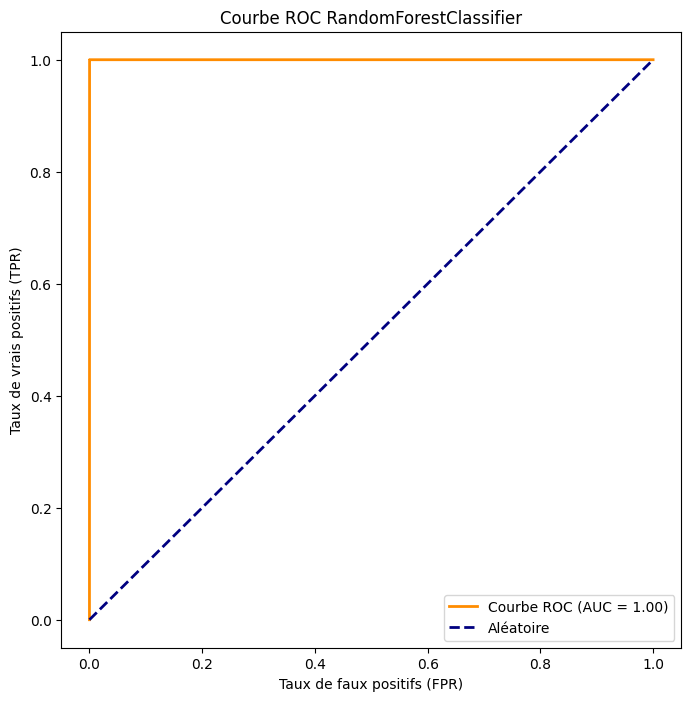

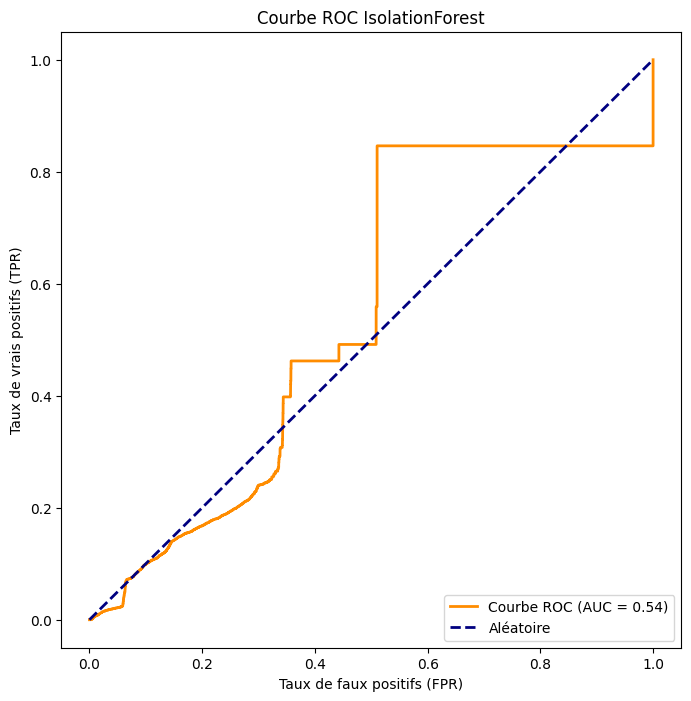

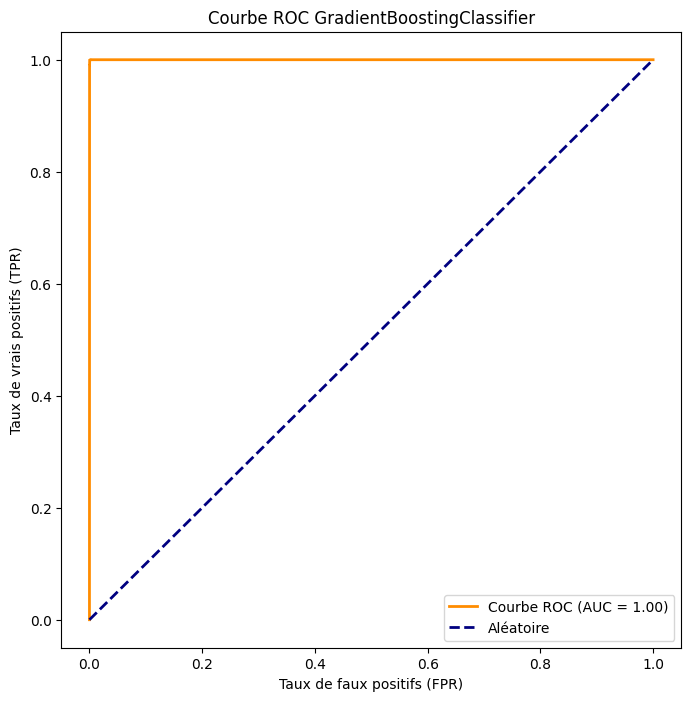

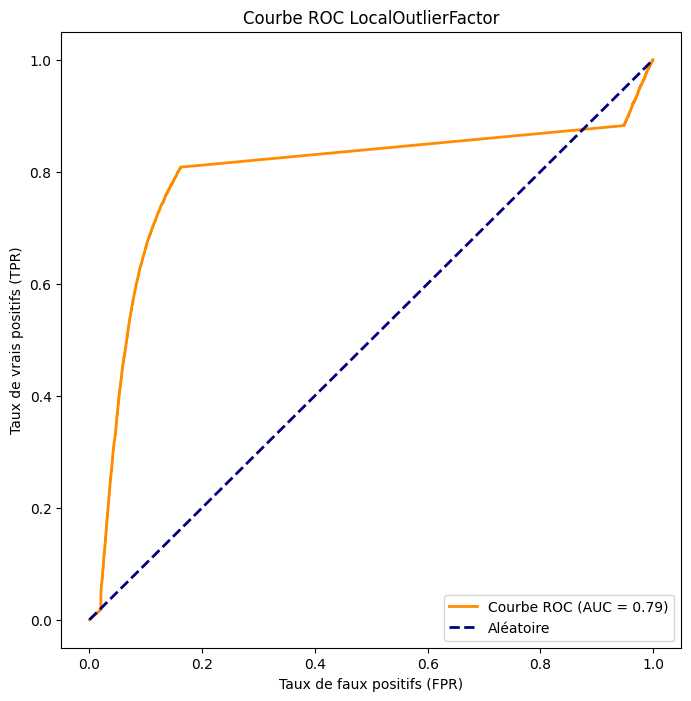

In [8]:
models=[RF,IF,GBC,LOF]
best_model=0
best_metric=0
best_threshold=0
for model in models :
    seuil,balanced_acc=roc(model,X_test,y_test)
    if balanced_acc>best_metric:
        best_metric=balanced_acc
        best_model=model
        best_threshold=seuil

In [9]:
print(f'meilleur modele : {type(best_model).__name__}, balanced accuracy : {best_metric}, meilleur seuil : {best_threshold}')

meilleur modele : RandomForestClassifier, balanced accuracy : 0.499922898997687, meilleur seuil : 0.4995759939312258
